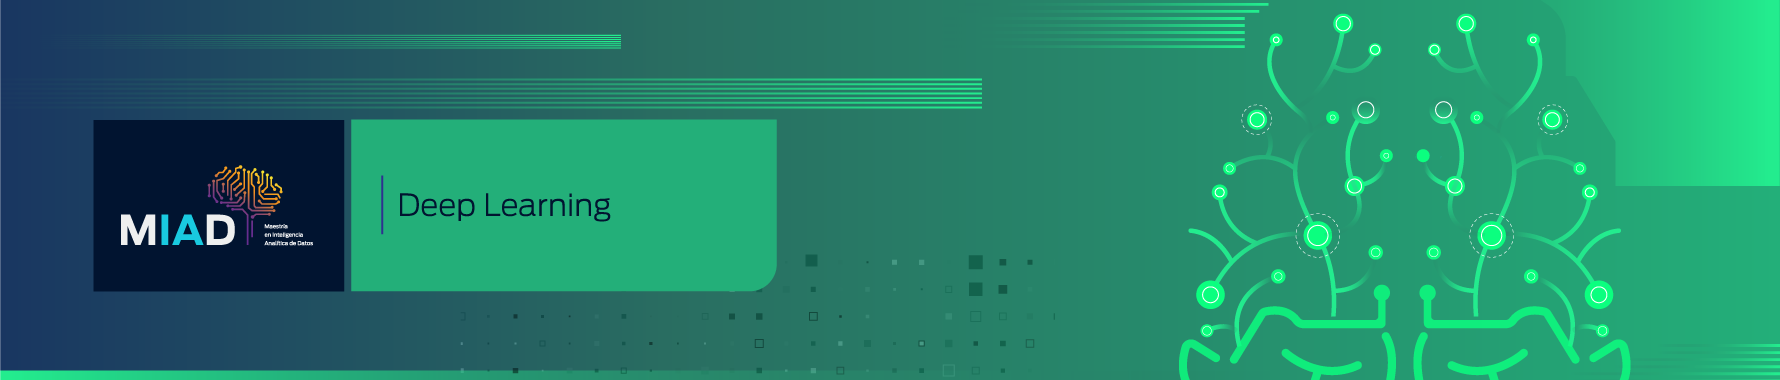

# Estrategias de implementación
# Deep learning - Semana 3: 
# Comparación Mini-_batch_ con diferentes tamaños de lote en Keras

### Propósito
En esta actividad se implementan y comparan las diferentes estrategias de mini-_batch_ y gradiente descendiente estocástico. 

### Instrucciones generales
Esta es una actividad individual, la cual puede descargar eligiendo la opción ‘Download as’ del menú ‘File’ y descargar el archivo en formato notebook (.ipynb). También puede resolverla directamente sobre la herramienta del curso.

En el laboratorio hay dos ejercicios: 
1. Comparación de métodos de lotes en el caso de regresión lineal simple.
2. Implementación de mini-_batch_ en _Keras_ y comparación de tamaños de lote.



## 1. Comparación de métodos de lotes en el caso de regresión lineal simple

En este caso se trabajará un conjunto de datos simulado, usando como modelo generador de datos una regresión lineal con una sola variable predictora _input_. En particular se define el modelo:

$$ Y_i = \beta_0 + \beta_1X_i + \varepsilon_i $$

para $i=1,2,...,n=100$ y con valor de los parámetros $\beta_o=5$ y $\beta_1=1$. El error aleatorio se simula como  $\varepsilon_i\sim Normal(0,1)$, independiente para cada observación.

### Generación de Datos Simulados

A continuación, se simulan los datos que se trabajarán en este notebook:

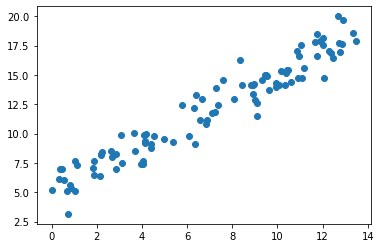

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt

n=100
X = np.c_[[1]*n, 13.5 * np.random.rand(n, 1)]
y = 5 + X[:, 1].reshape((n, 1)) + np.random.randn(n, 1)
plt.scatter(X[:,1],y)

### Base comparativa: Estimación por mínimos cuadrados

Se compararán las estimaciones realizadas por diferentes métodos con la solución analítica dada por mínimos cuadrados:

$$ \hat\beta= (X^TX)^{-1}X^TY $$

In [2]:
XT=np.transpose(X)
beta_ols= np.dot(np.dot(np.linalg.inv(np.dot(XT,X)),XT),y)
print(beta_ols)

[[5.18515079]
 [0.98102556]]


### Implementacion _Batch Gradient Descent_
Se usa toda la muestra para cada iteración de descenso. Recordemos que, en este caso, el gradiente de la función de pérdida (suma de cuadrados de errores) se calcula como:

$$ L(\beta)={2\over n} \left[X^TX\beta-X^TY\right] $$

En este caso, usaremos un _learning rate_ de $\alpha=0.001$.

In [3]:
n_epochs = 50000   #Número máximo de épocas (ephocs) - en batch corresponden al número de iteraciones
beta = np.random.randn(2, 1)*0.05  #Inicialización de parámetros
learning_rate=0.001
stop = False
epoch=0
loss_batch=list()
start = time.time()

while stop == False:
    gradients = (2/n) * (np.dot(np.dot(XT,X),beta) - np.dot(XT,y) )
    beta = beta - (gradients * learning_rate)
    if (np.linalg.norm(gradients) < 0.00001):
            stop = True
    if (epoch > n_epochs):
            stop = True
    epoch += 1
    loss_batch.append(1/n*np.dot((y-np.dot(X,beta)).T,(y-np.dot(X,beta))))
end = time.time()

print("Beta estimado: " +str(beta))
print("Tiempo de ejecución: " +str(end - start))
print("Norma gradiente: " +str(np.linalg.norm(gradients)))
print("Número de iteraciones: " +str(epoch))

Beta estimado: [[5.18513074]
 [0.98102772]]
Tiempo de ejecución: 0.6806883811950684
Norma gradiente: 9.999116187559133e-06
Número de iteraciones: 25080


### Implementacion _Mini-Batch Gradient Descent_
En este caso se actualiza el gradiente usando un lote de tamaño _mini_batch_size_ en cada iteración.

Note que, por motivos de convergencia, se aumentan el número de _epochs_ y la tasa de aprendizaje; y se disminuye la tolerancia.


In [4]:
n_epochs = 5000   #Número máximo de épocas (ephocs)
iterations = 1
learning_rate=0.005
mini_batch_size = 50
beta = np.random.randn(2, 1)*0.05  #Inicialización de parámetros
stop = False
loss_mini=list()
start = time.time()

while stop == False:
    ini=int((iterations-1)%(n/mini_batch_size))*mini_batch_size
    Xb=X[ini:(ini+mini_batch_size):]
    yb=y[ini:(ini+mini_batch_size)]
    gradients = (2/n) * (np.dot(np.dot(Xb.T,Xb),beta) - np.dot(Xb.T,yb) )
    beta = beta - (gradients * learning_rate)
    if (np.linalg.norm(gradients) < 0.0005):  #Tenga en uenta que el gradiente cambia
            stop = True
    if (int(iterations/((n/mini_batch_size))) > n_epochs):
            stop = True
    iterations += 1
    loss_mini.append(1/n*np.dot((y-np.dot(X,beta)).T,(y-np.dot(X,beta))))
end = time.time()

print("Beta estimado: " +str(beta))
print("Tiempo de ejecución: " +str(end - start))
print("Norma gradiente: " +str(np.linalg.norm(gradients)))
print("Número de epochs: " +str(int(iterations/((n/mini_batch_size)))))

Beta estimado: [[5.18494856]
 [0.98370269]]
Tiempo de ejecución: 0.23904824256896973
Norma gradiente: 1.07115390907211
Número de epochs: 5001


El caso de la versión complétamente estocástica _Stochastic Gradient Descent_ (SGD), equivale a hacer el tamaño de cada lote igual a 1.

#### Ejercicio:
Corra el algortimo de _mini-batch_ con tamaños de lote iguales a 5, 10, 20 y 50. Compare la convergencia y los tiempos de ejecución.

### Visualización del descenso 
En el siguiente código se presentan las gráficas mostrando el descenso de la función objetivo a medida que aumentan las iteraciones y los _epochs_.

Text(0, 0.5, 'Función objetivo - Batch')

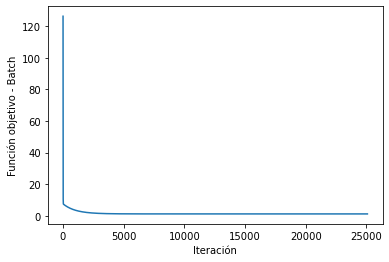

In [5]:
plt.plot(np.arange(len(loss_batch)),np.array(loss_batch)[:,0])
plt.xlabel("Iteración")
plt.ylabel("Función objetivo - Batch")

Text(0, 0.5, 'Función objetivo - Mini')

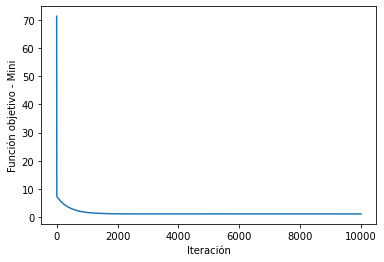

In [6]:
plt.plot(np.arange(len(loss_mini)),np.array(loss_mini)[:,0])
plt.xlabel("Iteración")
plt.ylabel("Función objetivo - Mini")

## 2. Implementación de mini-_batch_ en _Keras_ y comparación de tamaños de lote

En _Keras_ el parámetro usado para controlar el tamaño de lote es: "batch_size" Dependiendo de las configuraciones de máquina particulares, _Keras_ usa por _default_ la estrategia de mini-_batch_, con un tamaño de lote de 32. 

En este caso, uasaremos la base de datos del _National Institute of Diabetes and Digestive and Kidney Diseases_. La variable de interés 'Clase' es una variable binaria que toma el valor de 1 en caso de que el paciente tenga diabetes o de 0 en caso contrario. Estos datos ya habían sido usados en un ejercicio anterior y en este caso, exploraremos la sensibilidad de la estimación de la red en términos del _batch_.

In [7]:
import pandas as pd
from numpy import loadtxt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

dataset = pd.read_csv('test2.csv', sep=",")
dataset=dataset.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.20)

Using TensorFlow backend.


Ahora estimamos el modelo. Primero usaremos la estrategia _batch_ , es decir, se usan todos los datos en cada iteración del algoritmo.

In [8]:
n=X_train.shape[0]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time.time()

history=model.fit(X_train, y_train, epochs=250, batch_size=n)
end = time.time()

Epoch 1/250
614/614 [==============================] - 0s 323us/step - loss: 3.3358 - accuracy: 0.4121
Epoch 2/250
614/614 [==============================] - 0s 3us/step - loss: 3.1663 - accuracy: 0.4137
Epoch 3/250
614/614 [==============================] - 0s 2us/step - loss: 3.0044 - accuracy: 0.4186
Epoch 4/250
614/614 [==============================] - 0s 2us/step - loss: 2.8504 - accuracy: 0.4300
Epoch 5/250
614/614 [==============================] - 0s 2us/step - loss: 2.7035 - accuracy: 0.4332
Epoch 6/250
614/614 [==============================] - 0s 5us/step - loss: 2.5642 - accuracy: 0.4365
Epoch 7/250
614/614 [==============================] - 0s 3us/step - loss: 2.4315 - accuracy: 0.4511
Epoch 8/250
614/614 [==============================] - 0s 3us/step - loss: 2.3058 - accuracy: 0.4577
Epoch 9/250
614/614 [==============================] - 0s 3us/step - loss: 2.1876 - accuracy: 0.4658
Epoch 10/250
614/614 [==============================] - 0s 3us/step - loss: 2.0776 - accu

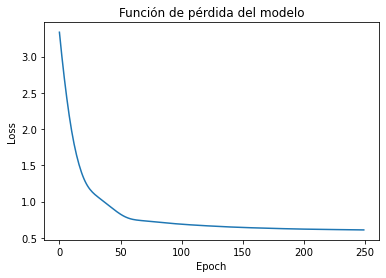

Tiempo de ejecución: 1.3924877643585205


In [9]:
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("Tiempo de ejecución: " +str(end - start))

### Tamaño de lote intermedio:

Ahora estimaremos el modelo usando un tamaño de lote de 64:

In [10]:
start = time.time()
history=model.fit(X_train, y_train, epochs=250, batch_size=64)
end = time.time()

Epoch 1/250
614/614 [==============================] - 0s 21us/step - loss: 0.6101 - accuracy: 0.6792
Epoch 2/250
614/614 [==============================] - 0s 19us/step - loss: 0.6096 - accuracy: 0.6759
Epoch 3/250
614/614 [==============================] - 0s 18us/step - loss: 0.6084 - accuracy: 0.6808
Epoch 4/250
614/614 [==============================] - 0s 15us/step - loss: 0.6063 - accuracy: 0.6775
Epoch 5/250
614/614 [==============================] - 0s 16us/step - loss: 0.6058 - accuracy: 0.6889
Epoch 6/250
614/614 [==============================] - 0s 15us/step - loss: 0.6045 - accuracy: 0.6857
Epoch 7/250
614/614 [==============================] - 0s 24us/step - loss: 0.6026 - accuracy: 0.6857
Epoch 8/250
614/614 [==============================] - 0s 22us/step - loss: 0.6031 - accuracy: 0.6840
Epoch 9/250
614/614 [==============================] - 0s 26us/step - loss: 0.6010 - accuracy: 0.6922
Epoch 10/250
614/614 [==============================] - 0s 21us/step - loss: 0.599

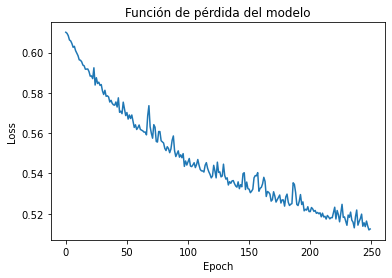

Tiempo de ejecución: 3.153381824493408


In [11]:
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("Tiempo de ejecución: " +str(end - start))

### Tamaño de lote pequeño:

Ahora estimaremos el modelo usando un tamaño de lote de 4:

In [12]:
start = time.time()
history=model.fit(X_train, y_train, epochs=250, batch_size=4)
end = time.time()

Epoch 1/250
614/614 [==============================] - 0s 236us/step - loss: 0.5728 - accuracy: 0.7150
Epoch 2/250
614/614 [==============================] - 0s 238us/step - loss: 0.5643 - accuracy: 0.6906
Epoch 3/250
614/614 [==============================] - 0s 242us/step - loss: 0.5467 - accuracy: 0.7199
Epoch 4/250
614/614 [==============================] - 0s 258us/step - loss: 0.5451 - accuracy: 0.7264
Epoch 5/250
614/614 [==============================] - 0s 247us/step - loss: 0.5412 - accuracy: 0.7134
Epoch 6/250
614/614 [==============================] - 0s 225us/step - loss: 0.5350 - accuracy: 0.7378
Epoch 7/250
614/614 [==============================] - 0s 245us/step - loss: 0.5576 - accuracy: 0.7231
Epoch 8/250
614/614 [==============================] - 0s 259us/step - loss: 0.5247 - accuracy: 0.7476
Epoch 9/250
614/614 [==============================] - 0s 267us/step - loss: 0.5374 - accuracy: 0.7313
Epoch 10/250
614/614 [==============================] - 0s 230us/step - l

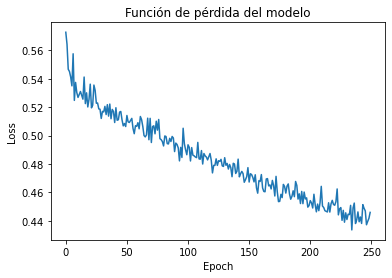

Tiempo de ejecución: 36.77347803115845


In [13]:
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("Tiempo de ejecución: " +str(end - start))


## Reflexión sobre la implementación:

En los 3 casos se usaron el mismo número de $epochs=250$. Sin embargo, es claro que las tres estrategias usadas tienen tiempos de implementación muy diferentes, y parece que algunos tienen muchas más iteraciones.

1. ¿Qué relación debe haber entre el número de _epochs_ y el tamaño de lote? ¿Se debe usar simepre el mismo número de _epochs_ sin importar el tamaño de lote?
2. ¿Cuál de las tres implementaciones realizó más iteraciones de descenso?